# DES SN 5YR Tutorial Part 3: Load DES SN Classification

<img align="left" src = ../_static/images/logo044.jpg width=120 style="padding: 10px"> 
<br><b>Dark Energy Survey Supernova Program</b>

<b>Tutorial Part 3</b>
<b>Load SN classfication</b> <br>
Contact author: Bruno Sánchez
(bsanchez@cppm.in2p3.fr) 
<br>

This tutorial is intended to show how to load the data from the classification files provided with this release.

We will load the package `utils` module and `data` module.

`utils` provides functionality to read the data formats

`data` provides with the location of the downloaded DR files.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from dessndr import utils, data

This is the loacation of the cloned DR repository in our system:

In [4]:
print(data.DES5YRDR_DATA)

/Users/sanchez/Data/DES/DESSNDR/DES-SN5YR


In [5]:
probas = pd.read_csv(os.path.join(data.DES5YRDR_DATA, '3_CLASSIFICATION/DES_classification.csv'))

In [6]:
probas

,CID,CIDint,PROB_SCONE,PROB_SNIRFV19,PROB_SNNDESCC,PROB_SNNJ17,PROB_SNNV19
0,1246275,1246275,0.9902,0.8486,1.0000,0.9999,1.0000
1,1246281,1246281,0.9432,1.0000,1.0000,0.9999,1.0000
2,1246314,1246314,0.9891,0.7823,0.9993,0.9970,0.9998
3,1246527,1246527,0.9757,1.0000,0.9997,0.9998,1.0000
4,1246529,1246529,0.9549,0.9407,0.9996,0.9993,1.0000
...,...,...,...,...,...,...,...
1630,1948484,1948484,0.8789,0.9146,0.9640,0.9935,0.9996
1631,1950024,1950024,0.9000,0.9380,0.9999,0.9937,0.9355
1632,1950043,1950043,0.9573,0.9454,0.9964,0.9874,0.2608
1633,1959025,1959025,0.9867,0.8921,0.9996,0.9996,0.9998


Text(0.5, 0, 'P(SNIa)')

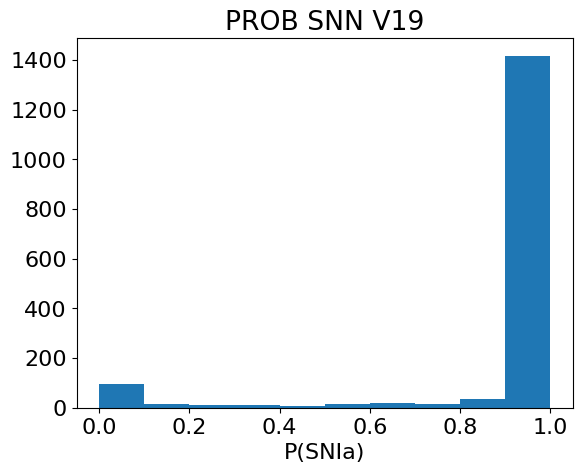

In [7]:
plt.hist(probas.PROB_SNNV19)
plt.title('PROB SNN V19')
plt.xlabel('P(SNIa)')

Now we are going to load the DES photometry files:

In [8]:
phot_version = os.path.join(
    data.DES5YRDR_DATA_ROOT, 
    'DES-SN5YR/0_DATA/DES-SN5YR_DESDR/DES-SN5YR_DESDR'
)
phot = utils.PhotFITS(phot_version)

Let's select a few of the high probability!

In [9]:
random_snias = probas[probas.PROB_SNIRFV19==1.].sample(3).CID.values

In [10]:
from dessndr import plot

In [11]:
lc = phot.get_lc(random_snias[0])

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1387101'}, xlabel='MJD', ylabel='Flux'>)

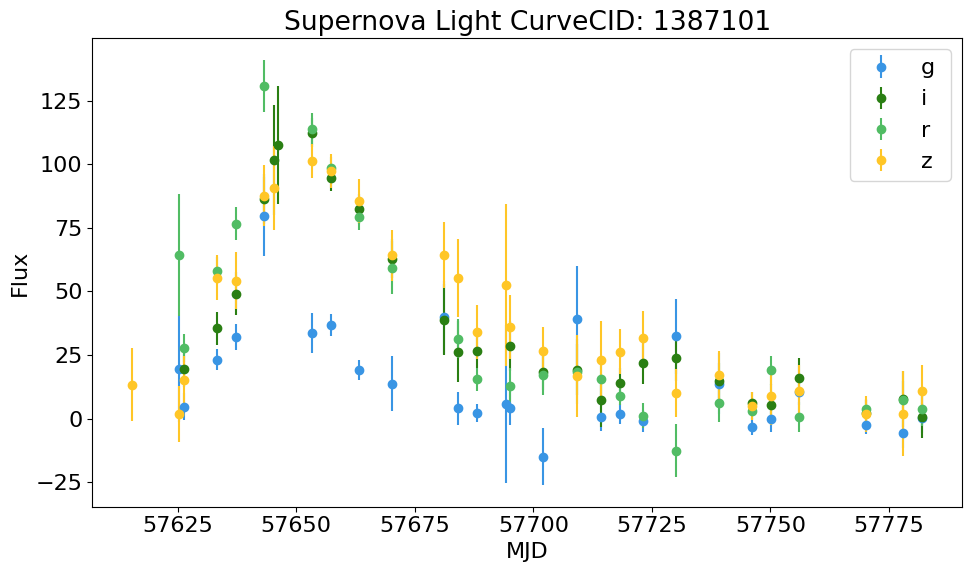

In [12]:
plot.plot_sn_light_curve(lc, CID=random_snias[0], figsize=(10, 6))

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1341743'}, xlabel='MJD', ylabel='Flux'>)

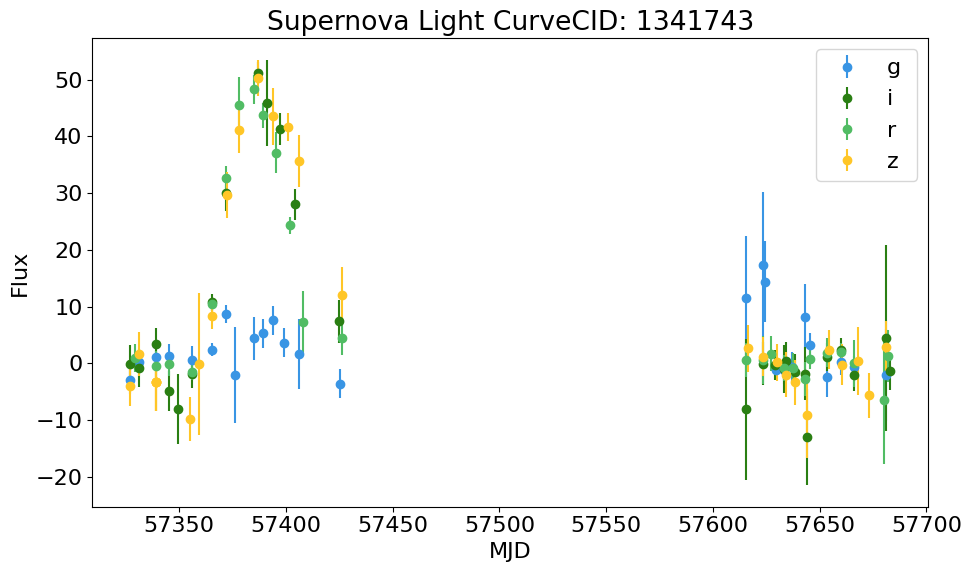

In [13]:
lc = phot.get_lc(random_snias[1])
plot.plot_sn_light_curve(lc, CID=random_snias[1], figsize=(10, 6))

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1655086'}, xlabel='MJD', ylabel='Flux'>)

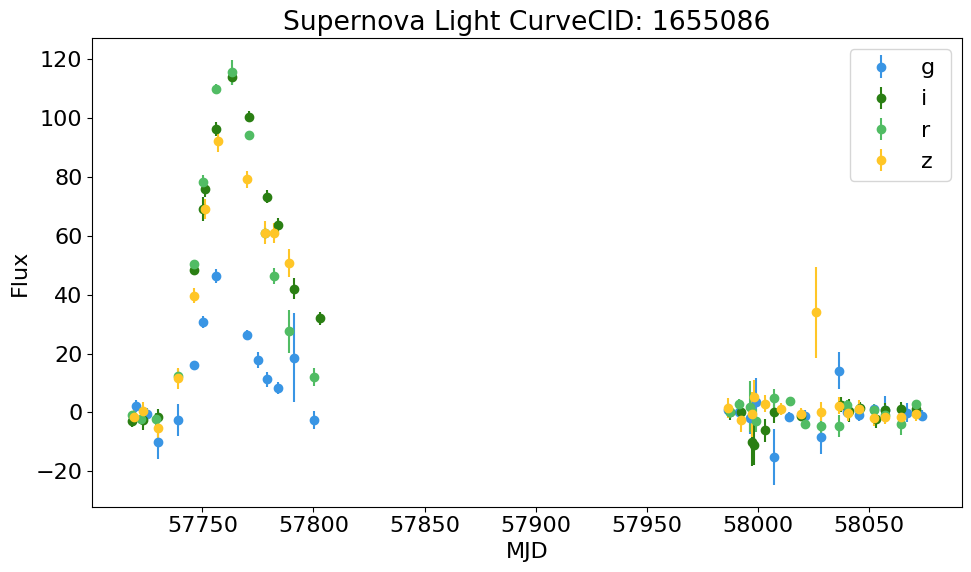

In [14]:
lc = phot.get_lc(random_snias[2])
plot.plot_sn_light_curve(lc, CID=random_snias[2], figsize=(10, 6))

Now let's check a few of the bad ones!

In [15]:
random_snias = probas[probas.PROB_SNIRFV19<0.1].sample(3).CID.values

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1298369'}, xlabel='MJD', ylabel='Flux'>)

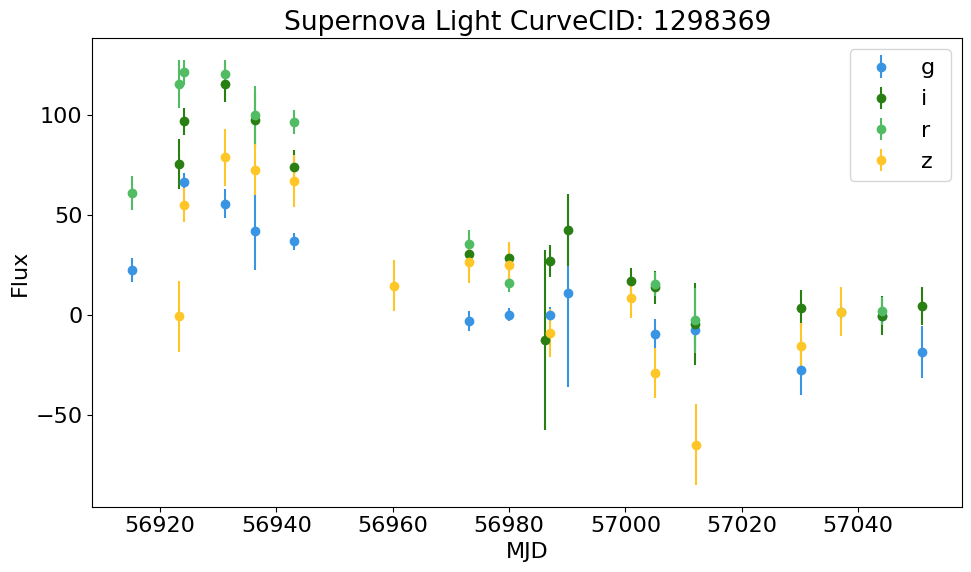

In [16]:
lc = phot.get_lc(random_snias[0])
plot.plot_sn_light_curve(lc, CID=random_snias[0], figsize=(10, 6))

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1253324'}, xlabel='MJD', ylabel='Flux'>)

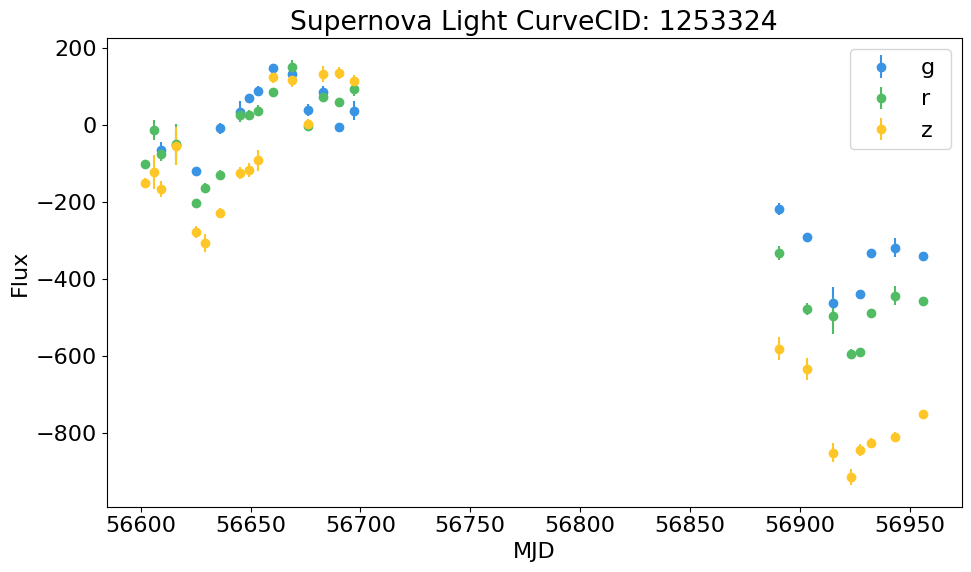

In [17]:
lc = phot.get_lc(random_snias[1])
plot.plot_sn_light_curve(lc, CID=random_snias[1], figsize=(10, 6))

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1457045'}, xlabel='MJD', ylabel='Flux'>)

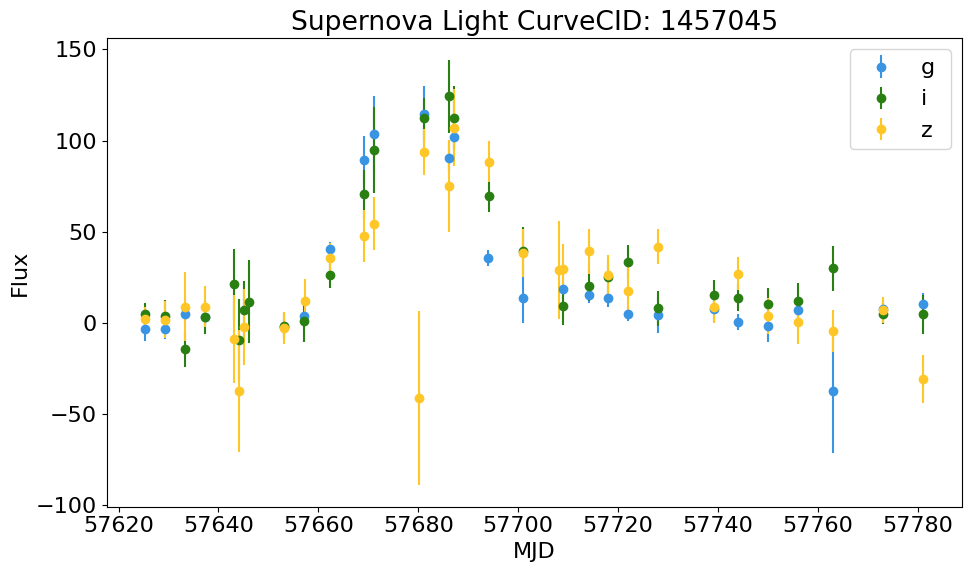

In [18]:
lc = phot.get_lc(random_snias[2])
plot.plot_sn_light_curve(lc, CID=random_snias[2], figsize=(10, 6))